In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results = pd.read_csv(
    './../../../data_source/results/dtree_univariate_sbs/50evals_50reps_dtree_univariate_sbs_dfs.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,memory,steps,VarianceThreshold,StandardScaler,StudentTTestSelection,DTreeEstimator,VarianceThreshold__threshold,StandardScaler__copy,...,Chi2Selection__error_handling,Chi2Selection__num_features,MRMRSelection,MRMRSelection__error_handling,MRMRSelection__num_features,MRMRSelection__num_neighbors,ReliefFSelection,ReliefFSelection__error_handling,ReliefFSelection__num_features,ReliefFSelection__num_neighbors
0,44,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,StudentTTestSelection_DTreeEstimator,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","StudentTTestSelection(error_handling='all', me...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
results.shape

(400, 59)

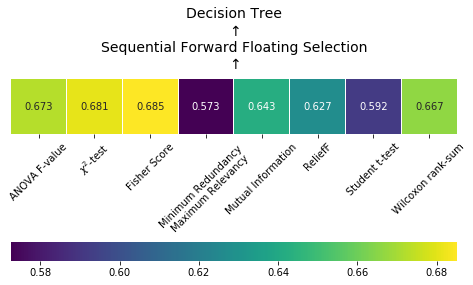

In [4]:
model_grps = results.groupby('experiment_id')
_avg_scores = model_grps['test_score'].mean()
_rows, _cols = zip(*list(map(lambda label: label.split('_'), _avg_scores.index)))
rows, cols = np.unique(_rows), np.unique(_cols)
avg_scores = model_grps['test_score'].mean().values.reshape(np.size(cols), np.size(rows))
std_scores = model_grps['test_score'].std().values.reshape(np.size(cols), np.size(rows))

model_name = 'Decision Tree' + '\n' + r'$\uparrow$' + '\n' + 'Sequential Forward Floating Selection' + '\n' + r'$\uparrow$'

selector_names = [
    'ANOVA F-value', r'$\chi^2$-test', 'Fisher Score',
    'Minimum Redundancy \nMaximum Relevancy', 
    'Mutual Information', 'ReliefF', 
    'Student t-test',
    'Wilcoxon rank-sum'
]
fig, (axis, cbar_axis) = plt.subplots(
    nrows=2, 
    gridspec_kw={'height_ratios': (1.5, 0.05), 'hspace': -0.5}, 
    figsize=(8, 8)
)
fig.subplots_adjust(wspace=0.0001)
sns.heatmap(
    avg_scores,
    #xticklabels=selector_names,  
    yticklabels='',
    vmin=np.nanmin(avg_scores) - 1e-4, 
    vmax=np.nanmax(avg_scores) + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.3f', 
    square=1, 
    linewidth=.2, 
    ax=axis,
    cbar=True,
    cbar_ax=cbar_axis,
    cbar_kws={'shrink': 0.2, 'orientation': 'horizontal'},  
    
)
axis.set_xticklabels(selector_names, ha='center')
# Position the text.
axis.text(
    0.5, 1.7, 
    model_name, 
    transform=axis.transAxes, 
    fontsize=14,    
    va='center',
    ha='center'
)
axis.tick_params(rotation=45)
plt.savefig(
    './../../../figures/50vals_50reps_dtree_univariate_sbs_dfs.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [5]:
std_scores

array([[0.03705297, 0.02752061, 0.02448242, 0.04050465, 0.05617993,
        0.03278796, 0.04086686, 0.05184967]])